## Experimenting with Neural Network architecture

Does more layers neccessarily mean better performance? In what ways can we tune our network?

In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
labels = []
examples = []

# Replace filename with the path to the CSV where you have the year predictions data saved.
filename = "/mnt/c/Users/Aumit/Desktop/YearPredictionMSD.txt/yp.csv"
with open(filename, 'r') as f:
    for line in f:
        content = line.split(",")
        
        labels.append(int(content[0]))

        content.pop(0)

        content = [float(elem) for elem in content]

        # If we want a list of numpy arrays, not necessary
        #npa = np.asarray(content, dtype=np.float64)

        examples.append(content)

In [3]:
total_array = np.array(examples)
total_labels = np.array(labels)
# Split training and test:
training_examples = total_array[:100000]
#training_examples = random.sample(total_array, 10)
training_labels = total_labels[:100000]

test_examples = total_array[-1000:]
test_labels = total_labels[-1000:]

Adaptive learning rate + smaller neural net (1 layer, 100 nodes). Using stochastic gradient descent.

In [4]:
clf = MLPClassifier(solver='sgd', alpha=1e-5,
                     hidden_layer_sizes=(100), random_state=1)

clf.fit(training_examples, training_labels)   

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [5]:
y_pred = clf.predict(test_examples)

(array([   1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  999.]),
 array([ 2006.  ,  2006.01,  2006.02,  2006.03,  2006.04,  2006.05,
         2006.06,  2006.07,  2006.08,  2006.09,  2006.1 ,  2006.11,
         2006.12,  2006.13,  2006.14,  2006.15,  2006.16,  2006.17,
      

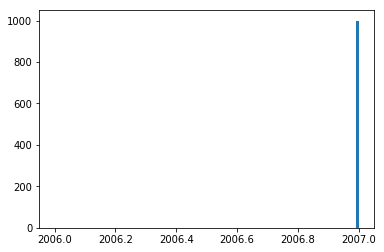

In [7]:
plt.hist(y_pred, bins = 100)

How about 2 small layers? 

In [8]:
clf = MLPClassifier(solver='sgd', alpha=1e-5,
                     hidden_layer_sizes=(10, 10), random_state=1)

clf.fit(training_examples, training_labels) 

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [9]:
y_pred = clf.predict(test_examples)

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,  1000.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.]),
 array([ 2006.5 ,  2006.51,  2006.52,  2006.53,  2006.54,  2006.55,
         2006.56,  2006.57

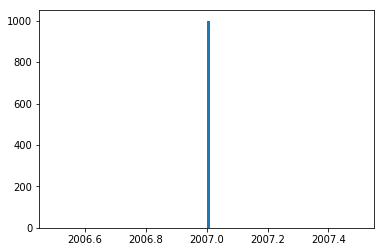

In [10]:
plt.hist(y_pred, bins=100)

Some next steps: 
* Consider shuffling and picking random samples for training and test sets as opposed to just selecting the first 100000 for our training data. 
* Figure out how many hidden layers/nodes we should have: ftp://ftp.sas.com/pub/neural/FAQ3.html#A_hu
* Confirm that the neural net is performing the way we think it should be performing with psedo input. If the the network fails on fake input, then we know that there is an issue somewhere in our pipelne. https://blog.slavv.com/37-reasons-why-your-neural-network-is-not-working-4020854bd607